In [1]:
import pandas as pd
import seaborn as sn
from sklearn.feature_selection import chi2, SelectKBest


In [197]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lap 7-8\\house.csv')


In [ ]:
df.head()
# df['Suburb'].value_counts()

Suburb
Reservoir         337
Bentleigh East    240
Preston           230
Richmond          196
Brunswick         187
                 ... 
Wallan              1
New Gisborne        1
Plumpton            1
Kooyong             1
Monbulk             1
Name: count, Length: 313, dtype: int64

In [198]:
import numpy as np
df.describe(include=np.number)

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11661.000000,11661.000000,1.166100e+04,11661.000000,11661.000000,11661.000000,11661.000000,11598.000000,11661.000000,6077.000000,6924.000000,11661.000000,11661.000000,11661.000000
mean,11560.186519,3.099305,1.147083e+06,10.766855,3104.795644,3.072464,1.584512,1.691757,651.063974,163.708464,1962.145147,-37.744978,144.760228,7319.439585
std,6608.582499,0.895050,6.473556e+05,5.947577,94.579340,0.911324,0.707226,0.991602,4299.561697,584.486961,38.278983,1.527140,5.849349,4399.975758
min,1.000000,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1196.000000,-38.182550,0.000000,249.000000
25%,5755.000000,3.000000,7.150000e+05,6.900000,3044.000000,3.000000,1.000000,1.000000,270.000000,104.000000,1936.750000,-37.856520,144.923790,4019.000000
50%,11764.000000,3.000000,9.730000e+05,10.200000,3083.000000,3.000000,1.000000,2.000000,533.000000,134.000000,1965.000000,-37.796200,145.003040,6482.000000
75%,17274.000000,4.000000,1.400000e+06,13.500000,3147.000000,4.000000,2.000000,2.000000,676.000000,183.000000,1997.000000,-37.749800,145.066500,9758.000000
max,23545.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,0.000000,145.526350,21650.000000


In [89]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,11661,11661,11661,11661,11661,11661,10291,11661
unique,313,11482,3,5,253,58,33,8
top,Reservoir,2 Bruce St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,337,3,9291,7939,1360,435,1030,3661


In [90]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [91]:
# phát hiện miss
num_col = df.columns[df.isnull().any()]
print(df[num_col].isnull().sum())

Car               63
BuildingArea    5584
YearBuilt       4737
CouncilArea     1370
dtype: int64


In [ ]:
#  chọn những cột numberic vì nó dựa trên độ lệch và trung vị hoặc trung bình nên chỉ áp dụng lên số
num_cols = df.select_dtypes(include=['float64','int64']).columns

ourline_idx = set()
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    indx = df[(df[col] > lower) & (df[col] < upper)].index
    ourline_idx.update(indx)
# 4. Kết quả
print(f"Tìm thấy {len(ourline_idx)} dòng outlier theo IQR")
# print(sorted(ourline_idx)[:10])


Tìm thấy 11661 dòng outlier theo IQR


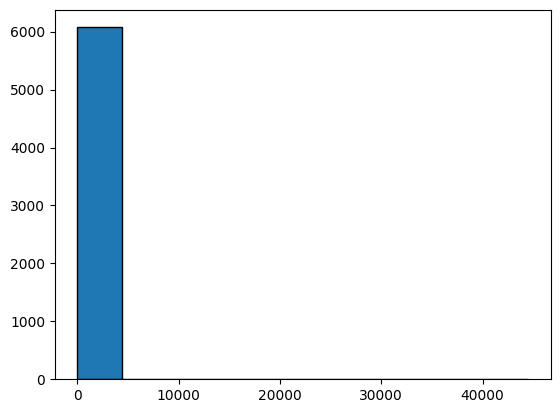

In [93]:
import matplotlib.pyplot as plt
import seaborn as sb
#bar, his, scatter, 
plt.hist(df['BuildingArea'], bins=10, edgecolor = 'k')
plt.show()

In [ ]:
# plt.boxplot([df['Landsize'], df['Price']], label=['Building', 'Price'])
# plt.grid(True)
# plt.title('Sự phân bộ dữ liệu của diện tính xây dựng và giá tiền ')
# plt.show()

In [ ]:
# # 1. Lấy tất cả cột số
# num_cols = df.select_dtypes(include='number').columns

# # 2. Vẽ histogram cho các cột số
# df[num_cols].hist(figsize=(14, 10))
# plt.suptitle('Distribution of Numeric Features', y=1.02)
# plt.tight_layout()
# plt.show()

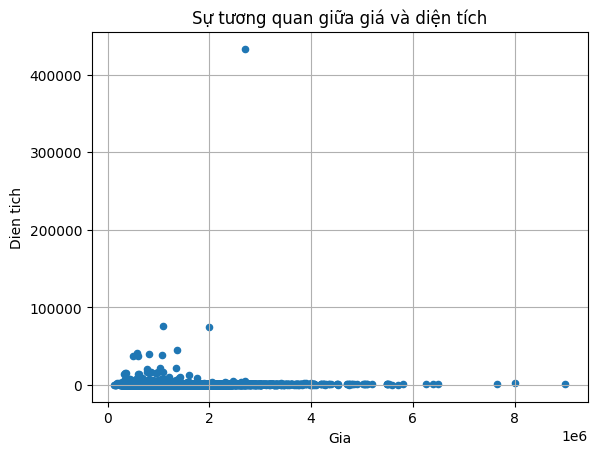

In [102]:
# biểu đồ tương quan
df.plot(kind='scatter', x='Price', y = 'Landsize')
plt.title('Sự tương quan giữa giá và diện tích')
plt.xlabel('Gia')
plt.ylabel('Dien tich')
plt.grid(True)
plt.show()

In [103]:
#phân tích dữ liệu mất công bằng
df['Price'].value_counts()

Price
1100000    104
1300000    103
1200000     95
1000000     94
800000      91
          ... 
1447500      1
1012500      1
412700       1
1100500      1
1194700      1
Name: count, Length: 2085, dtype: int64

In [166]:
corr_matrix = df[num_cols].corr()

In [200]:
data = df.copy()

In [201]:
#xóa các trường k cần thiết
cols_to_drop = ['Unnamed: 0', 'Address']
data.drop(cols_to_drop, axis=1, inplace=True)

In [202]:
# xử lý dữ liệu thiếu của object
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode().iloc[0])

In [203]:
# xử lý dữ liệu thiếu của numberic
cols = ['Car', 'BuildingArea', 'YearBuilt']
for col in cols:
    data[col] = data[col].fillna(data[col].mean())

In [174]:
data.dtypes

Suburb            object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [204]:
# tiến hành xử lý ourlier 
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

exclude_cols = ['Postcode'] # loại bỏ các cột không cần thiết
numeric_cols = [col for col in num_cols if col not in exclude_cols]

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

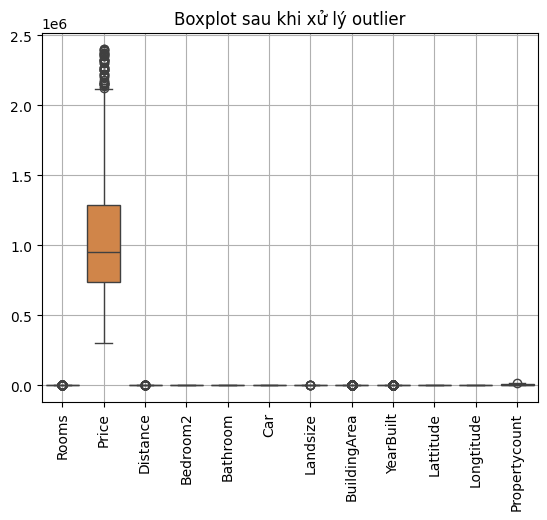

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=90)
plt.title('Boxplot sau khi xử lý outlier')
plt.grid(True)
plt.show()

In [206]:
#mã hóa nhãn: 
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["category"] = le.fit_transform(df["category"])

#liêt kê các cột objec ra để biên về one-hot
cols = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

data = pd.get_dummies(data, columns= cols, drop_first=True)

In [177]:
data.head(5)

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
3,3,850000,04/03/17,2.5,3067,3,2,1.0,94,163.708464,...,False,False,False,False,True,True,False,False,False,False
14,3,955000,17/09/2016,2.5,3067,3,1,0.0,183,163.708464,...,False,False,False,False,True,True,False,False,False,False
23,3,1290000,25/02/2017,2.5,3067,3,1,1.0,168,124.000000,...,False,False,False,False,True,True,False,False,False,False
34,4,785000,06/08/16,13.5,3042,3,1,2.0,597,127.000000,...,False,False,False,False,False,False,False,False,False,True
42,5,755000,14/05/2016,13.5,3042,3,2,2.0,596,163.708464,...,False,False,False,False,False,False,False,False,False,True


In [195]:
data.drop(columns='Price_lable', axis=1, inplace=True)

In [207]:
cut_lable = ['Low', 'meadium', 'high']
cut_bin = [0, 1000000, 2000000, 1000000000]
data['Price_lable'] = pd.cut(data['Price'], bins = cut_bin, labels= cut_lable)
data.drop('Price', axis= 1, inplace=True)

In [140]:
data['Date'].dtype

dtype('<M8[ns]')

In [208]:
data["Date"] = pd.to_datetime(data["Date"])

C:\Users\Minh Chi\AppData\Local\Temp\ipykernel_5820\2487158108.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


In [209]:
#thay thế giá trị thiếu bằng các trường này 
data['Year']  = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day']   = data['Date'].dt.day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11661 entries, 0 to 11660
Columns: 625 entries, Rooms to Day
dtypes: bool(609), category(1), float64(6), int32(3), int64(6)
memory usage: 8.0 MB


In [211]:

data.drop(columns='Date', axis=1, inplace=True)
data.head(1)



,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Price_lable,Year,Month,Day
3,3,2.5,3067,3,2,1.0,94,163.708464,1962.145147,-37.7969,...,True,True,False,False,False,False,Low,2017,4,3


In [212]:
# #chuẩn hóa dữ liêu: ở đây dùng minMax scaler
# bắt đầu chuẩn hóa min max đưa dữ liệu về 0 và 1 
from sklearn.preprocessing import MinMaxScaler
#tạo tuổi mới cho căn nhà từ yearBuilt
data['HouseAge'] = 2025 - data['YearBuilt'] # Số năm lớn không phản ánh rõ độ cũ/mới → nên chuyển thành “tuổi” rồi mới chuẩn hóa 
data.drop(columns='YearBuilt', inplace=True)

scater = MinMaxScaler()
data[['Lattitude', 'HouseAge', 'BuildingArea', 'Landsize']] = scater.fit_transform(data[['Lattitude', 'HouseAge', 'BuildingArea', 'Landsize']])

#chuẩn hóa z-score đưa về độ lệch chuẩn và giá trị trung bình



In [213]:
data_train = data.copy()

In [214]:
#tiến hành chọn thuộc tính
from sklearn.model_selection import train_test_split
X = data_train.drop(columns='Price_lable') # biến đầu vào
y = data_train['Price_lable'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
data['Price_lable'].value_counts()

Price_lable
Low        1674
meadium    1278
high         72
Name: count, dtype: int64

In [ ]:
# sử lý bằng under-saling
# dataset_0 = df[df.Class == 0]
# dataset_1 = df[df.Class == 1]

# dataset_0.shape, dataset_1.shape

# dataset_0_rus = dataset_0.sample(dataset_1.shape[0])
# dataset_0_rus.shape

# dataset_random_under = pd.concat([dataset_0_rus, dataset_1])
# dataset_random_under.shape


# #
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)

In [216]:
# xử lý dữ liệu mất cần bằng # smote
data_train['Price_lable'].value_counts()
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [30]:
X_train_bal.shape, y_train_bal.shape

((27783, 624), (27783,))

In [217]:
# lựa chọn thuộc tính selecKbest
# chọn k tốt nhất (chi2)
#Xem điểm trước

# select = SelectKBest(score_func=chi2, k = 5)
# select.fit(X_train, y_train)

# df_score = pd.DataFrame({
#     'feature: ': X_train.columns,
#     'chi2_score': select.scores_
# }).sort_values(by='chi2_score', ascending=False)
# print(df_score)


#hoặc là tiến hàng làm sau khi chọn test luôn

select = SelectKBest(score_func=chi2, k = 5)
X_train_sel = select.fit_transform(X_train_bal, y_train_bal)
X_test_sel = select.transform(X_test)

# # Xem tên các cột được chọn
selected_features = X_train.columns[select.get_support()]
print("5 đặc trưng tốt nhất:", selected_features.tolist())

5 đặc trưng tốt nhất: ['Distance', 'Postcode', 'Propertycount', 'CouncilArea_Stonnington', 'Regionname_Southern Metropolitan']


In [218]:
from sklearn.tree import DecisionTreeClassifier
tree_full = DecisionTreeClassifier(random_state=True);

#huấn luyện dữ liệu sau khi chọn và y train sau cân bằng
tree_full.fit(X_train_sel, y_train_bal)
#dự đoán
y_pred_tree = tree_full.predict(X_test_sel)

In [219]:
target = data['Price_lable'].unique()
target


['Low', 'meadium', 'high']
Categories (3, object): ['Low' < 'meadium' < 'high']

In [220]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3024 entries, 3 to 11655
Columns: 425 entries, Rooms to HouseAge
dtypes: bool(409), category(1), float64(7), int32(3), int64(5)
memory usage: 1.5 MB


In [221]:
from sklearn import datasets
from sklearn import tree
from IPython.display import Image
import pydotplus

#create dot data
dot_data = tree.export_graphviz(tree_full,
                                out_file=None,
                                feature_names=selected_features,
                                class_names=target)


In [222]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
# đánh giá hiệu xuất
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred_tree)
print('Accuracy: ', acc)


print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred_tree))


print('Classification report: ')
print(classification_report(y_test, y_pred_tree))

Accuracy:  0.9592798971281612
Confusion matrix: 
[[   1    0    4]
 [   0    1    3]
 [  29   59 2236]]
Classification report: 
              precision    recall  f1-score   support

         Low       0.03      0.20      0.06         5
        high       0.02      0.25      0.03         4
     meadium       1.00      0.96      0.98      2324

    accuracy                           0.96      2333
   macro avg       0.35      0.47      0.36      2333
weighted avg       0.99      0.96      0.98      2333



In [ ]:
# Thử với ramdom forest nêu bạn chon

In [45]:
#Tiếp theo vẽ Roc curve và tính Auc mô hình trên
#chuyển y_test về nhị phân
from sklearn.preprocessing import label_binarize
#giả sử bạn phân thành 3 lớp thị low, meadium, high
y_test_bin = label_binarize(y_test, classes=['low', 'meadium', 'high'])
n_classes = y_test_bin.shape[1]
n_classes

3

In [47]:
#Lấy xác xuất dự đoán
y_score = tree_full.predict_proba(X_test_sel)


In [48]:
#tính roc, và auc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

d:\learn_PyThon\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


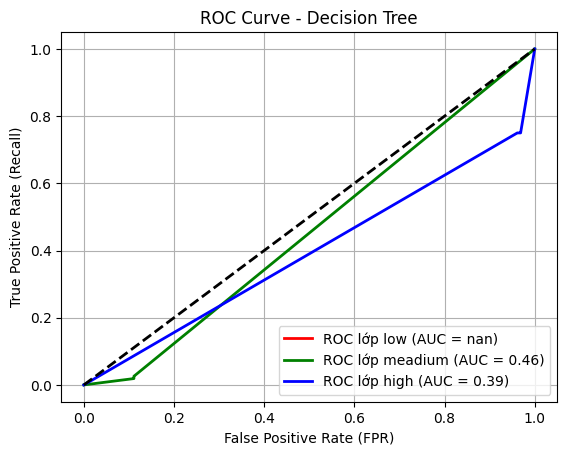

In [49]:
colors = ['red', 'green', 'blue']
class_names = ['low', 'meadium', 'high']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC lớp {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) #lw: light width: độ dày cảu đường\
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
# plt.tight_layout()
plt.show()


In [50]:
# tiếp theo mình sẽ tới phân cụm 
 #đầu tiên phân cụm k cần nhãn thì xóa  nhãn price_lable
x_cluster = data.drop(columns='Price_lable', errors='ignore')



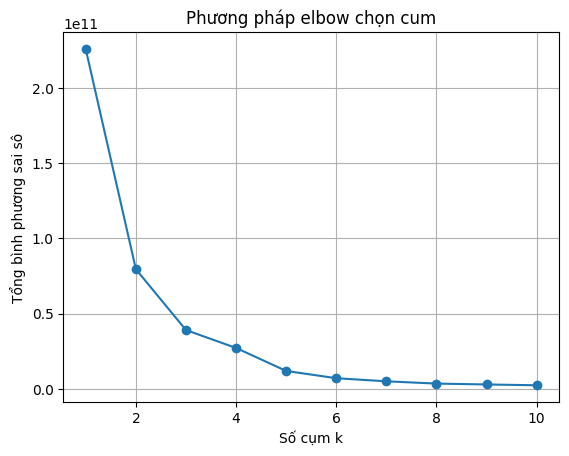

In [51]:
#Xác định cụm tối ưu bằng elbow
from sklearn.cluster import KMeans

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_cluster)
    sse.append(kmeans.inertia_) #tổng sai số của các cụm

#vẽ biểu đồ
plt.plot(K, sse, marker = 'o')
plt.xlabel('Số cụm k');
plt.ylabel('Tổng bình phương sai sô')
plt.title('Phương pháp elbow chọn cum')
plt.grid(True)
plt.show()

In [52]:
#phân cụm kmeans với k = 4
kmeans = KMeans(n_clusters=5, random_state=43)
cluster_lables = kmeans.fit_predict(x_cluster)

data['cluster'] = cluster_lables

In [53]:
#nhóm theo cluster  và so sánh giá trị trung bình từng cột để diễn giải 

# Trung bình mỗi cụm
cluster_summary = data.groupby('cluster').mean(numeric_only=True)
cluster_summary


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,HouseAge
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.137620,10.160081,3087.377757,3.108108,1.620690,1.689221,0.001656,0.003698,0.010644,144.840891,...,0.043181,0.000000,0.000000,0.150668,0.004349,0.022678,0.285182,0.383660,0.005592,0.069254
1,2.895138,10.241468,3100.900858,2.872259,1.426120,1.605776,0.001636,0.003327,0.010607,144.996240,...,0.178265,0.000000,0.015253,0.779790,0.000000,0.021926,0.081030,0.060057,0.000000,0.065787
2,3.107747,10.808848,3122.895006,3.084153,1.615415,1.718712,0.001460,0.003601,0.011570,144.728740,...,0.000000,0.003539,0.007078,0.278018,0.002359,0.060165,0.425088,0.145891,0.000000,0.066274
3,3.100136,11.496504,3098.042091,3.077054,1.551935,1.684420,0.001452,0.003849,0.013494,144.495435,...,0.053971,0.003055,0.006110,0.221656,0.007128,0.053632,0.215886,0.310251,0.004752,0.066313
4,3.134454,10.897111,3122.664916,3.099790,1.619748,1.718768,0.001296,0.003675,0.010016,144.945590,...,0.000000,0.000000,0.000000,0.341387,0.000000,0.018382,0.494223,0.058298,0.000000,0.071708


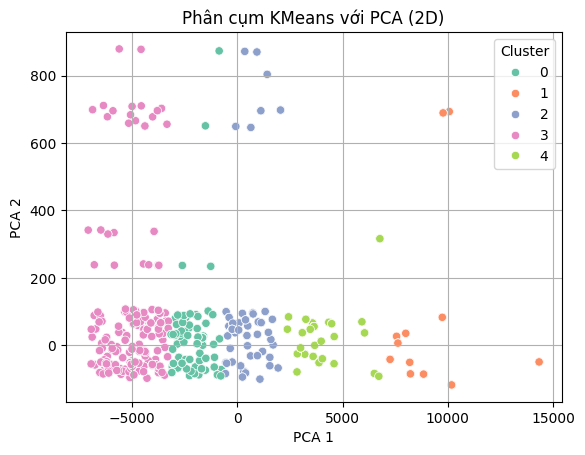

In [54]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_cluster)

sns.scatterplot(x=X_pca[:, 0], # trục x
                 y=X_pca[:, 1], #trục y
                hue=cluster_lables # màu theo cột 
                , palette='Set2')
plt.title('Phân cụm KMeans với PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
# plt.tight_layout()
plt.show()


In [55]:
#Luật kết hợp: để dùng đc thì phải chuyển toàn bộ về 0 1
from mlxtend.frequent_patterns import apriori, association_rules


# tìm tập mục thường xuyên( mục tiêu để tìm tập hợp nào xuất hiện ít nhất trong 40% giao dịch )
frequent_itemsets = apriori(data, min_support=0.4, use_colnames=True)
frequent_itemsets


d:\learn_PyThon\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.85)
# X ⇒ Y thỏa mãn độ tin cậy (confidence) ≥ 0.85, đồng thời support của X∪Y vẫn ≥ min_support bạn đã đặt trước đó.
rules